# 資料科學家養成全書 ch8 機器學習-監督式學習

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn

## 多元線性迴歸 Multiple Linear Regression

#### 讀取資料

In [2]:
import requests, zipfile
import io

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
res = requests.get(url).content
auto = pd.read_csv(io.StringIO(res.decode('UTF-8')), header=None)
auto.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
auto.shape

(205, 26)

In [4]:
auto.columns = ['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels',
               'engine-location','wheel-base','length','width','height','curb-weight','engine-type','num-of-cylinders',
               'engine-size','fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg',
               'highway-mpg','price']

In [5]:
auto.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


#### 整理資料

由horsepower, width, height來預測price

In [6]:
auto = auto[['price','horsepower','width','height']]
#看該欄位資料列中含有'?'的數量
auto.isin(['?']).sum()

price         4
horsepower    2
width         0
height        0
dtype: int64

In [7]:
#將'?'取代為 np.nan，然後將含有 np.nan未知數的資料列去除
auto = auto.replace('?', np.nan).dropna()

In [8]:
print('汽車資料的形式:{}'.format(auto.shape))
print(f'資料型別的確認:\n{auto.dtypes}')

汽車資料的形式:(199, 4)
資料型別的確認:
price          object
horsepower     object
width         float64
height        float64
dtype: object


In [9]:
auto = auto.assign(price=pd.to_numeric(auto['price']))
auto['horsepower'] = auto['horsepower'].astype(int)
print(f'資料型別的確認:{auto.dtypes}')

資料型別的確認:price           int64
horsepower      int32
width         float64
height        float64
dtype: object


In [10]:
auto.corr()

,price,horsepower,width,height
price,1.000000,0.810533,0.753871,0.134990
horsepower,0.810533,1.000000,0.615315,-0.087407
width,0.753871,0.615315,1.000000,0.309223
height,0.134990,-0.087407,0.309223,1.000000


目標變數為price，觀察其他變數中，horsepower與width的相關性稍微偏高0.6，若將相關性較高的變數同時作為多元線性迴歸的解釋變數，可能發生多元共線性(multi-collinearity)的問題，會造成迴歸係數的變異數變大而失去係數的顯著性，通常會只挑出能代表該高相關性變數群的變數來用於模型中。

In [11]:
#匯入資料分割的模組
from sklearn.model_selection import train_test_split
#匯入多元線性迴歸模型建構的模組
from sklearn.linear_model import LinearRegression

#指定目標變數為 price，其他為解釋變數
X = auto.drop('price',axis=1)
y = auto['price']

#分為訓練資料與測試資料
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5, random_state=0)

#多元線性迴歸的初始化與學習
model = LinearRegression()
model.fit(X_train, y_train)

#訓練資料決定係數
model.score(X_train,y_train)

0.7333575683901378

In [12]:
#測試資料決定係數
model.score(X_test,y_test)

0.7370688738125766

In [13]:
#顯示迴歸係數與截距
pd.Series(model.coef_, index=X.columns)

horsepower      81.651078
width         1829.174506
height         229.510077
dtype: float64

In [14]:
model.intercept_

-128409.04630338572

訓練資料與測試資料分數相當接近，可判斷此模型並沒有陷入overfitting的情況。

## 邏輯迴歸 Logistic regression

#### 讀取資料

In [15]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
res = requests.get(url).content
adult = pd.read_csv(io.StringIO(res.decode('utf-8')), header=None)
adult.columns = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship',
                'race','sex','capital-gain','capital-loss','hours-per-week','native-country','flg-50K']
adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,flg-50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [16]:
adult.shape

(32561, 15)

In [17]:
#檢查遺漏值
adult.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
flg-50K           0
dtype: int64

#### 整理資料

將收入大於50K或小於等於50K的資料轉為1與0

In [18]:
adult['flg-50K'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [19]:
adult.groupby('flg-50K').size()

flg-50K
 <=50K    24720
 >50K      7841
dtype: int64

In [20]:
adult['fin_flg'] = adult['flg-50K'].map(lambda x: 1 if x == ' >50K' else 0)
adult.groupby('fin_flg').size()

fin_flg
0    24720
1     7841
dtype: int64

In [21]:
#匯入資料分割的模組
from sklearn.model_selection import train_test_split
#匯入多元線性迴歸模型建構的模組
from sklearn.linear_model import LogisticRegression

#指定目標變數為 price，其他為解釋變數
X = adult[['age','fnlwgt','education-num','capital-gain','capital-loss']]
y = adult['fin_flg']

#分為訓練資料與測試資料
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5, random_state=0)

#邏輯迴歸的初始化與學習
model = LogisticRegression()
model.fit(X_train, y_train)

#訓練資料決定係數
model.score(X_train,y_train)

0.7971130221130222

In [22]:
#測試資料決定係數
model.score(X_test,y_test)

0.7979853817333088

In [23]:
#顯示迴歸係數
model.coef_

array([[-1.18545968e-02, -4.37932054e-06, -2.77432658e-03,
         3.27384955e-04,  7.53237842e-04]])

In [24]:
#當個別係數增加一個1時，對預測機率有何種程度的影響之指標(沒有影響時為1.0)
np.exp(model.coef_)

array([[0.98821539, 0.99999562, 0.99722952, 1.00032744, 1.00075352]])

#### 標準化

In [25]:
#匯入用於標準化的類別
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#標準化處理
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

#邏輯迴歸的初始化與學習
model = LogisticRegression()
model.fit(X_train_std, y_train)

#訓練資料決定係數
model.score(X_train_std,y_train)

0.8106265356265356

In [26]:
#測試資料決定係數
model.score(X_test_std,y_test)

0.8101467968797985

解釋變數的尺度一致可使機器學習的演算法運作得更好，但須注意是使用於訓練資料上，測試資料是當作未知資料，不能使用該資料來進行標準化。

#### 正則化項的迴歸：Lasso迴歸、Ridge迴歸

In [27]:
#用於Ridge迴歸的類別
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

#分為訓練資料與測試資料
X = auto.drop('price', axis=1)
y = auto['price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5, random_state=0)

#建構模型
linear = LinearRegression()
ridge = Ridge(random_state=0)

for model in [linear, ridge]:
    model.fit(X_train, y_train)
    print(f'{model.__class__.__name__}(train): {model.score(X_train, y_train)}')
    print(f'{model.__class__.__name__}(test): {model.score(X_test, y_test)}')

LinearRegression(train): 0.7333575683901378
LinearRegression(test): 0.7370688738125766
Ridge(train): 0.7333547383511863
Ridge(test): 0.7377676885006832


In [28]:
del auto, adult, linear, ridge, LinearRegression, Ridge

## 決策樹

#### 讀取資料

In [29]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
res = requests.get(url).content
mushroom = pd.read_csv(io.StringIO(res.decode('utf-8')), header=None)
mushroom.columns = ['classes','cap_shape','cap_surface','cap_color','odor','bruises','gill_attachment','gill_spacing',
                    'gill_size','gill_color','stalk_shape','stalk_root','stalk_suface_above_ring','stalk_surface_below_ring',
                    'stalk_color_above_ring','stalk_color_below_ring','veil_type','veil_color','ring_number','ring_type',
                   'spore_print_color','population','habitat']
mushroom.head()

,classes,cap_shape,cap_surface,cap_color,odor,bruises,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


#### 整理資料

將解釋變數與目標變數由類別變成數值變數，利用 pd.get_dummies() 進行 one-hot encoding

In [30]:
mushroom_dummy = pd.get_dummies(mushroom[['gill_color','gill_attachment','odor','cap_color']])
mushroom_dummy.head()

,gill_color_b,gill_color_e,gill_color_g,gill_color_h,gill_color_k,gill_color_n,gill_color_o,gill_color_p,gill_color_r,gill_color_u,...,cap_color_b,cap_color_c,cap_color_e,cap_color_g,cap_color_n,cap_color_p,cap_color_r,cap_color_u,cap_color_w,cap_color_y
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [31]:
#將目標變數 0/1化
mushroom_dummy['flg'] = mushroom['classes'].map(lambda x: 1 if x == 'p' else 0)
mushroom_dummy.groupby('flg')['flg'].count()

flg
0    4208
1    3916
Name: flg, dtype: int64

#### 熵

以資訊獲利最大的分歧條件來分割資料，接著對分割後得資料同樣以資料獲利最大的分歧條件來進行探索，這就是決策樹的處理動作。

資訊獲利 (information gain) 為 父資料集之熵 - $\sum${(子資料集之大小 / 父資料集之大小) * 子資料集之熵}。
當熵值越大，分割後所造成的熵減少就越大，可得知它是越有用的判斷條件。

In [32]:
# 毒菇資料熵(entropy)的初始值
entropy_init = -( (4208/8124) * np.log2(4208/8124) + (3916/8124) * np.log2(3916/8124) )
entropy_init

0.9990678968724603

In [33]:
mushroom_dummy.groupby(['cap_color_c','flg'])['flg'].count().unstack()

flg,0,1
cap_color_c,,
0,4176,3904
1,32,12


In [34]:
# cap_color不為c時的熵
p1 = 4176 / (4176+3904)
p2 = 1 - p1
entropy_c0 = -(p1 * np.log2(p1) + p2 * np.log2(p2))
entropy_c0

0.9991823984904757

In [35]:
# cap_color為c時的熵
p1 = 32 / (32+12)
p2 = 1 - p1
entropy_c1 = -(p1 * np.log2(p1) + p2 * np.log2(p2))
entropy_c1

0.8453509366224364

In [36]:
entropy_after = (4176+3904) / 8124 * entropy_c0 + (32+12)/8124 * entropy_c1
print(f'資料分割後的平均熵: {entropy_after}')
print(f'以變數cap_color進行分割所得的資訊獲利: {entropy_init - entropy_after}')

資料分割後的平均熵: 0.9983492394158581
以變數cap_color進行分割所得的資訊獲利: 0.0007186574566022674


In [37]:
mushroom_dummy.groupby(['gill_color_b','flg'])['flg'].count().unstack()

flg,0,1
gill_color_b,,
0,4208.0,2188.0
1,NaN,1728.0


In [38]:
# gill_color不為b時的熵
p1 = 4208 / (4208+2188)
p2 = 1 - p1
entropy_b0 = -(p1 * np.log2(p1) + p2 * np.log2(p2))
# gill_color為b時的熵
p1 = 0 / (0+1728)
p2 = 1 - p1
entropy_b1 = -(p2 * np.log2(p2))

entropy_after = ((4208+2188)/8124 * entropy_b0 + (0+1728)/8124 * entropy_b1 )
print(f'以變數gill_color進行分割所得的資訊獲利: {entropy_init - entropy_after}')

以變數gill_color進行分割所得的資訊獲利: 0.2693983473195207


相較cap_color與gill_color進行分割後的資訊獲利，gill_color讓熵大幅下降，是較有用的條件分岐。

#### 決策樹的模型建構

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X = mushroom_dummy.drop('flg', axis=1)
y = mushroom_dummy['flg']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
model.fit(X_train, y_train)
print(f'準確度(train): {model.score(X_train, y_train)}')
print(f'準確度(test): {model.score(X_test, y_test)}')

準確度(train): 0.8829804693911045
準確度(test): 0.8941408173313639


In [40]:
del mushroom, mushroom_dummy, entropy_b0, entropy_b1, entropy_c0, entropy_c1, entropy_init, entropy_after, DecisionTreeClassifier

## K-NN k最近鄰演算法

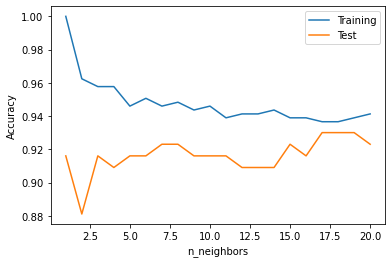

In [41]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

#讀取範例資料集
cancer = sklearn.datasets.load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=0)

#準備描繪圖形用的 list
training_accuracy = []
test_accuracy = []

#建構模型學習
for n_neighbors in range(1,21):
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train, y_train)
    training_accuracy.append(model.score(X_train,y_train))
    test_accuracy.append(model.score(X_test,y_test))
    
#描繪圖形
plt.plot(range(1,21),training_accuracy,label='Training')
plt.plot(range(1,21), test_accuracy, label='Test')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()

## 支援向量機 SVM

In [42]:
from sklearn.svm import LinearSVC

#讀取範例資料集
cancer = sklearn.datasets.load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=0)

model = LinearSVC()
model.fit(X_train, y_train)
print(f'準確度(train): {model.score(X_train, y_train)}')
print(f'準確度(test): {model.score(X_test, y_test)}')

準確度(train): 0.9154929577464789
準確度(test): 0.9300699300699301


C:\Users\angel\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [43]:
#標準化
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

model = LinearSVC()
model.fit(X_train_std, y_train)
print(f'準確度(train): {model.score(X_train_std, y_train)}')
print(f'準確度(test): {model.score(X_test_std, y_test)}')

準確度(train): 0.9929577464788732
準確度(test): 0.951048951048951
